# Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations

# Functions

In [2]:
#Проверка столбца (dtype object) на наличие уникальных значений и их количество 
def object_check(column):
    display(pd.DataFrame(column.value_counts()))
    print(column.unique())

#Проверка столбца (dtype float) при помощи гистограммы и 
#его характеристики (количество значений в столбце, среднее, стандартное отклонение, минимальное,
#25-й процентиль, 50-й процентиль, 75-й процентиль и максимальное)
def float_check(column):
    column.hist()
    print(column.describe())


# При добавлении нового столбца (dummy перменной) 
# ставим 1 - при наличии, 0 - при отсутствии
def find_item(cell):
    if item in cell:
        return 1
    return 0


# Проверка отсутствия значений в столбце
def procent_check(column, df):
    math = 100 - ((df[column].count() * 100) / len(df))
    print("В столбце",column,"отсутствует", '\033[4m' + str(round(math, 2)),"процентов" + '\033[0m',"информации.")
    
# Вывод основных статистических данных категориальных признаков
def categorical_check(column):
    display(pd.DataFrame(df[column].value_counts()))
    print(df[column].describe())

# Построение гистограммы и вывод основных статистических данных цифровых признаков
def numerical_check(column):
    display(df[column].hist(bins=100))
    print(df[column].describe())
    

# Короткая проверка датасета
def df_check(df):
    display(df.head())
    display(df.info())
    
def replace_nan(df,column):
    return df[column].astype(str).apply(lambda x: 'Unknown' if x == 'nan' else x)

# ---------------------------- Data ----------------------------

# Информация

### Customers:

* <i>CustomerKey</i> : ID клиента
* <i> FirstName</i> : Имя клиента 
* <i> LastName</i> : Фамилия клиента
* <i> Full Name</i> : Имя и Фамилия клиента
* <i> BirthDate</i> : День рождения клиента
* <i> AgeOfCustomer</i> : Возраст клиента на момент заказа
<br> &#10149; (данные получены при помощи 'BirthDate' и 'DateFirstPurchase')
* <i> Gender</i> : Пол клиента
* <i> DateFirstPurchase</i> : Дата заказа товара 
* <i> Customer City</i> : Город клиента

### Sales:

* <i> ProductKey</i> : ID товара
* <i> OrderDateKey</i> : ID Даты заказа
* <i> DueDateKey</i> : ID Срока сдачи
* <i> ShipDateKey</i> : ID Даты отправки 
* <i> SalesOrderNumber</i> : Номер поставки
* <i> SalesAmount</i> : Объем продаж

### Products:

* <i> ProductKey</i> : ID клиента
* <i> ProductItemCode</i> : Серия товара 
* <i> Product Name</i> : Название товара
* <i> Sub Category</i> : Подкатегория товара
* <i> Product Category</i> : Категория товара
* <i> StandardCost</i> : Стоимость товара
* <i> Product Color</i> : Цвет товара
* <i> Product Size</i> : Размер товара 
* <i> Product Line</i> : Линия товара
* <i> Model Name</i> : Название модели
* <i> Product Description</i> : Описание товара
* <i> Product Description DE</i> : Описание товара на немецком  
* <i> Product Status</i> : Статус товара

# Готовим датасеты

### Клиенты

In [3]:
customers = pd.read_csv('DIM_Customer.csv', sep = ';')

In [4]:
df_check(customers)

,CustomerKey,FirstName,LastName,Full Name,BirthDate,AgeOfCustomer,Gender,DateFirstPurchase,Customer City
0,11000,Jon,Yang,JonYang,1971-10-06,47,Male,2018-01-19,Rockhampton
1,11001,Eugene,Huang,EugeneHuang,1976-05-10,42,Male,2018-01-15,Seaford
2,11002,Ruben,Torres,RubenTorres,1971-02-09,47,Male,2018-01-07,Hobart
3,11003,Christy,Zhu,ChristyZhu,1973-08-14,44,Female,2017-12-29,North Ryde
4,11004,Elizabeth,Johnson,ElizabethJohnson,1979-08-05,39,Female,2018-01-23,Wollongong


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerKey        18484 non-null  int64 
 1   FirstName          18484 non-null  object
 2   LastName           18484 non-null  object
 3   Full Name          18484 non-null  object
 4   BirthDate          18484 non-null  object
 5   AgeOfCustomer      18484 non-null  int64 
 6   Gender             18484 non-null  object
 7   DateFirstPurchase  18484 non-null  object
 8   Customer City      18484 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.3+ MB


None

In [5]:
# Проверяем датасет на наличие пустых значений
customers.columns[customers.isnull().any()]

Index([], dtype='object')

In [6]:
# Избавляемся ненужных столбцов

# -- FirstName
# -- LastName

# так как мы заранее создали столбец возраста 
# в SQL, удалим следующие столбцы:

# -- BirthDate
# -- DateFirstPurchase

customers = customers.drop(['FirstName', 'LastName', 'BirthDate', 'DateFirstPurchase'], axis = 1)

### Продажи

In [7]:
# Продажи

sales = pd.read_csv('DIM_OnlineSales.csv', sep = ';')

In [8]:
df_check(sales)

,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,CustomerKey,SalesOrderNumber,SalesAmount
0,381,20190101,20190113,20190108,16942,SO46700,"1000,4375"
1,375,20190101,20190113,20190108,15114,SO46701,"2181,5625"
2,369,20190101,20190113,20190108,15116,SO46702,"2443,35"
3,337,20190101,20190113,20190108,20576,SO46703,"782,99"
4,370,20190101,20190113,20190108,13059,SO46704,"2443,35"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58168 entries, 0 to 58167
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ProductKey        58168 non-null  int64 
 1   OrderDateKey      58168 non-null  int64 
 2   DueDateKey        58168 non-null  int64 
 3   ShipDateKey       58168 non-null  int64 
 4   CustomerKey       58168 non-null  int64 
 5   SalesOrderNumber  58168 non-null  object
 6   SalesAmount       58168 non-null  object
dtypes: int64(5), object(2)
memory usage: 3.1+ MB


None

In [9]:
# Проверяем датасет на наличие пустых значений
sales.columns[sales.isnull().any()]

Index([], dtype='object')

In [10]:
# Избавляемся от ненужных столбцов:
# -- OrderDateKey
# -- DueDateKey
# -- ShipDateKey
# -- SalesOrderNumber

sales = sales.drop(['OrderDateKey', 'DueDateKey', 'ShipDateKey', 'SalesOrderNumber'], axis = 1)

In [11]:
# Переведем столбец -- SalesAmount в float
# 1 способ

sales['SalesAmount'] = pd.to_numeric(sales['SalesAmount'].str.replace(",", "."))

In [12]:
# Переведем столбец -- SalesAmount в float
# 2 способ

# sales.SalesAmount = sales.SalesAmount.astype(str).apply(lambda x: float(str(x).replace(",", "."))) 

### Товары

In [13]:
products = pd.read_csv('DIM_Product.csv', sep = ';')

In [14]:
df_check(products)

,ProductKey,ProductItemCode,Product Name,Sub Category,Product Category,StandardCost,Product Color,Product Size,Product Line,Model Name,Product Description,Product Description DE,Product Status
0,1,AR-5381,Adjustable Race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
1,2,BA-8327,Bearing Ball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
2,3,BE-2349,BB Ball Bearing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
3,4,BE-2908,Headset Ball Bearings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current
4,5,BL-2036,Blade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Current


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ProductKey              606 non-null    int64 
 1   ProductItemCode         606 non-null    object
 2   Product Name            606 non-null    object
 3   Sub Category            397 non-null    object
 4   Product Category        397 non-null    object
 5   StandardCost            395 non-null    object
 6   Product Color           352 non-null    object
 7   Product Size            299 non-null    object
 8   Product Line            380 non-null    object
 9   Model Name              397 non-null    object
 10  Product Description     396 non-null    object
 11  Product Description DE  396 non-null    object
 12  Product Status          606 non-null    object
dtypes: int64(1), object(12)
memory usage: 61.7+ KB


None

In [15]:
# Проверяем столбцы, в которых пустые значения

products.columns[products.isnull().any()]

Index(['Sub Category', 'Product Category', 'StandardCost', 'Product Color',
       'Product Size', 'Product Line', 'Model Name', 'Product Description',
       'Product Description DE'],
      dtype='object')

In [16]:
# Проверяем процент пустых значений

procent_check('Sub Category', products)
procent_check('Product Category', products)
procent_check('StandardCost', products)
procent_check('Product Color', products)
procent_check('Product Size', products)
procent_check('Product Line', products)
procent_check('Model Name', products)
procent_check('Product Description', products)
procent_check('Product Description DE', products)

В столбце Sub Category отсутствует 34.49 процентов информации.
В столбце Product Category отсутствует 34.49 процентов информации.
В столбце StandardCost отсутствует 34.82 процентов информации.
В столбце Product Color отсутствует 41.91 процентов информации.
В столбце Product Size отсутствует 50.66 процентов информации.
В столбце Product Line отсутствует 37.29 процентов информации.
В столбце Model Name отсутствует 34.49 процентов информации.
В столбце Product Description отсутствует 34.65 процентов информации.
В столбце Product Description DE отсутствует 34.65 процентов информации.


In [17]:
# Столбец -- StandardCost хранит в себе данные о стоимости товара
# Необходимо поменять тип этих данных и найти решение на замену 
# пустых показателей

products["StandardCost"] = pd.to_numeric(products["StandardCost"].str.replace(',','.'))

In [18]:
products["StandardCost"].fillna(value = 0, inplace = True)

In [19]:
# Когда мы поменяли значение NaN на 0,
# мы можем проверить гиптозу о наличии товара идентичного в списке

search_for_null = products.ProductItemCode[products["StandardCost"] == 0]
search_for_value = products.ProductItemCode[products["StandardCost"] > 0]

In [20]:
test_for_value = {}

for item in search_for_null:
    test_for_value[item] = 0

for item in test_for_value:
    for cell in search_for_value:
        if cell == item:
            test_for_value[item] +=1
        else:
            0

In [21]:
# Убедимся, что товар был уникальным и не встречается в датасете более 1 раза
display(sum(map((0).__eq__, test_for_value.values())))
test_for_value.items()

211

dict_items([('AR-5381', 0), ('BA-8327', 0), ('BE-2349', 0), ('BE-2908', 0), ('BL-2036', 0), ('CA-5965', 0), ('CA-6738', 0), ('CA-7457', 0), ('CB-2903', 0), ('CN-6137', 0), ('CR-7833', 0), ('CR-9981', 0), ('CS-2812', 0), ('DC-8732', 0), ('DC-9824', 0), ('DT-2377', 0), ('EC-M092', 0), ('EC-R098', 0), ('EC-T209', 0), ('FE-3760', 0), ('FH-2981', 0), ('FW-1000', 0), ('FW-1200', 0), ('FW-1400', 0), ('FW-3400', 0), ('FW-3800', 0), ('FW-5160', 0), ('FW-5800', 0), ('FW-7160', 0), ('FW-9160', 0), ('FC-3654', 0), ('FC-3982', 0), ('FL-2301', 0), ('GP-0982', 0), ('GT-0820', 0), ('GT-1209', 0), ('GT-2908', 0), ('HJ-1213', 0), ('HJ-1220', 0), ('HJ-1420', 0), ('HJ-1428', 0), ('HJ-3410', 0), ('HJ-3416', 0), ('HJ-3816', 0), ('HJ-3824', 0), ('HJ-5161', 0), ('HJ-5162', 0), ('HJ-5811', 0), ('HJ-5818', 0), ('HJ-7161', 0), ('HJ-7162', 0), ('HJ-9080', 0), ('HJ-9161', 0), ('HN-1024', 0), ('HN-1032', 0), ('HN-1213', 0), ('HN-1220', 0), ('HN-1224', 0), ('HN-1420', 0), ('HN-1428', 0), ('HN-3410', 0), ('HN-3416', 

In [22]:
# Второй способ убедиться в этом:

search_for_null_new = products[products["StandardCost"] == 0]
search_for_null_new.groupby(products["StandardCost"] == 0, sort = True)['ProductItemCode'].value_counts()

StandardCost  ProductItemCode
True          AR-5381            1
              BA-8327            1
              BE-2349            1
              BE-2908            1
              BL-2036            1
                                ..
              SR-2098            1
              SS-2985            1
              ST-9828            1
              TO-2301            1
              TP-0923            1
Name: ProductItemCode, Length: 211, dtype: int64

In [23]:
# Убедимся, что название товара уникально

search_for_name = products['Product Name'][products["StandardCost"] == 0]

col = {}

for item in search_for_name:
    col[item] = 0

for item in col:
    for cell in search_for_name:
        if cell == item:
            col[item] +=1
        else:
            0

In [24]:
display(sum(map((1).__eq__, col.values())))
len(col)

211

211

In [25]:
# Так как не удалось восстановить данные 
# по причине отсутствия дополнительных сведений,
# мы избавляемся от ненужных данных,
# но сначала избавимся от ненужных нам столбцов

# Избавляемся от ненужных столбцов:
# -- ProductItemCode
# -- Product Color
# -- Product Size
# -- Product Line
# -- Model Name
# -- Product Status

products = products.drop(['ProductItemCode','Product Color','Product Size'
                         ,'Product Line','Model Name','Product Status'], axis = 1)

In [26]:
products.columns

Index(['ProductKey', 'Product Name', 'Sub Category', 'Product Category',
       'StandardCost', 'Product Description', 'Product Description DE'],
      dtype='object')

In [27]:
products = products.dropna(axis=0)

In [28]:
df_check(products)

,ProductKey,Product Name,Sub Category,Product Category,StandardCost,Product Description,Product Description DE
209,210,"HL Road Frame - Black, 58",Road Frames,Components,0.0000,Our lightest and best quality aluminum frame m...,Unser leichtester und hochwertigster Aluminium...
210,211,"HL Road Frame - Red, 58",Road Frames,Components,0.0000,Our lightest and best quality aluminum frame m...,Unser leichtester und hochwertigster Aluminium...
211,212,"Sport-100 Helmet, Red",Helmets,Accessories,12.0278,"Universal fit, well-vented, lightweight , snap...","""Einheitsgröße, atmungsaktiv, leicht, aufsetzb..."
212,213,"Sport-100 Helmet, Red",Helmets,Accessories,13.8782,"Universal fit, well-vented, lightweight , snap...","""Einheitsgröße, atmungsaktiv, leicht, aufsetzb..."
213,214,"Sport-100 Helmet, Red",Helmets,Accessories,13.0863,"Universal fit, well-vented, lightweight , snap...","""Einheitsgröße, atmungsaktiv, leicht, aufsetzb..."


<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 209 to 605
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProductKey              396 non-null    int64  
 1   Product Name            396 non-null    object 
 2   Sub Category            396 non-null    object 
 3   Product Category        396 non-null    object 
 4   StandardCost            396 non-null    float64
 5   Product Description     396 non-null    object 
 6   Product Description DE  396 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 24.8+ KB


None

In [29]:
# Проверим наличие нулевых значений

count = 0

for item in products.StandardCost:
    if item == 0:
        count += 1
        
print(count)

2


In [30]:
# Избавившись от строк с нулевыми значениями мы получили
# две строки, у которых в столбце StandardCost отсутствует значения
# Через схожую категорию и подкатегории мы найдем среднее значени и добавим его

mean_components = round(float(products.groupby((products['Sub Category'] == 'Road Frames') 
                 & (products['Product Category'] == 'Components')
                )['StandardCost'].mean().drop(False)), 6)
mean_components

409.164677

In [31]:
products.StandardCost = products.StandardCost.apply(lambda x: mean_components if x == 0 else x)

In [32]:
products.columns[products.isnull().any()]

Index([], dtype='object')

## Собираем единный датасет

In [33]:
data = pd.merge(customers, sales, on = ['CustomerKey'])

In [34]:
df = pd.merge(data, products, on = ['ProductKey'])

In [35]:
df_check(df)

,CustomerKey,Full Name,AgeOfCustomer,Gender,Customer City,ProductKey,SalesAmount,Product Name,Sub Category,Product Category,StandardCost,Product Description,Product Description DE
0,11000,JonYang,47,Male,Rockhampton,353,2319.99,"Mountain-200 Silver, 38",Mountain Bikes,Bikes,1265.6195,Serious back-country riding. Perfect for all l...,Mountainbike für Profis. Perfekt für alle Schw...
1,11001,EugeneHuang,42,Male,Seaford,353,2319.99,"Mountain-200 Silver, 38",Mountain Bikes,Bikes,1265.6195,Serious back-country riding. Perfect for all l...,Mountainbike für Profis. Perfekt für alle Schw...
2,11015,ChloeYoung,36,Female,Burbank,353,2319.99,"Mountain-200 Silver, 38",Mountain Bikes,Bikes,1265.6195,Serious back-country riding. Perfect for all l...,Mountainbike für Profis. Perfekt für alle Schw...
3,11018,ClarenceRai,63,Male,Bendigo,353,2319.99,"Mountain-200 Silver, 38",Mountain Bikes,Bikes,1265.6195,Serious back-country riding. Perfect for all l...,Mountainbike für Profis. Perfekt für alle Schw...
4,11022,EthanZhang,36,Male,Bellingham,353,2319.99,"Mountain-200 Silver, 38",Mountain Bikes,Bikes,1265.6195,Serious back-country riding. Perfect for all l...,Mountainbike für Profis. Perfekt für alle Schw...


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58168 entries, 0 to 58167
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerKey             58168 non-null  int64  
 1   Full Name               58168 non-null  object 
 2   AgeOfCustomer           58168 non-null  int64  
 3   Gender                  58168 non-null  object 
 4   Customer City           58168 non-null  object 
 5   ProductKey              58168 non-null  int64  
 6   SalesAmount             58168 non-null  float64
 7   Product Name            58168 non-null  object 
 8   Sub Category            58168 non-null  object 
 9   Product Category        58168 non-null  object 
 10  StandardCost            58168 non-null  float64
 11  Product Description     58168 non-null  object 
 12  Product Description DE  58168 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.2+ MB


None

# Предобработка

In [36]:
# Для удобства просмотра убираем 
# ограничения просмотра ячейки
pd.set_option('display.max_colwidth', None)

In [37]:
# Переименуем индексы столбцов
df.columns = ['customer_key','full_name','customer_age',
              'gender','customer_city','product_key',
              'sales_amount','product_name','sub_category',
              'product_category','standard_cost','product_description',
              'product_description_de']

# Обработка

### customer_age

In [38]:
# Проверим возраст клиентов, тем самым узнаем возраст ЦА
# дополнительно построим гистограмму, для наглядности

object_check(df.customer_age)

,customer_age
45,2248
44,2233
39,2207
41,2149
40,2110
...,...
93,6
91,5
95,5
104,3


[ 47  42  36  63  67  66  65  37  61  60  59  55  43  46  48  39  41  50
  54  56  81  75  52  51  57  62  69  38  40  58  49  35  32  44  45  53
  34  72  64  71  70  68  80  77  73  33  79  74  83  76  82  84  92  78
  85  91 103  96  93  87  89 102  86  88  90 104  94 101  95  98  97 100]


8 клиентов старше 100 лет. Что составляет 0.04 % от количества клиентов.
221 клиентов от 80 до 100 лет. Что составляет 1.22 % от количества клиентов.
3892 клиентов от 60 до 80 лет. Что составляет 21.45 % от количества клиентов.
4496 клиентов от 50 до 60 лет. Что составляет 24.78 % от количества клиентов.
6279 клиентов от 40 до 50 лет. Что составляет 34.61 % от количества клиентов.
3245 клиентов от 30 до 40 лет. Что составляет 17.89 % от количества клиентов.
0 клиентов от 20 до 30 лет. Что составляет 0.0 % от количества клиентов.


array([[<AxesSubplot:title={'center':'customer_age'}>]], dtype=object)

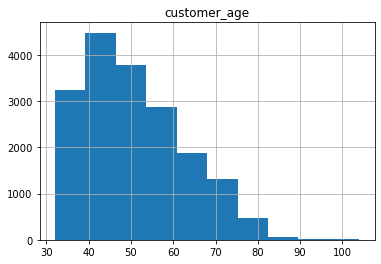

In [39]:
customer_age = df.groupby('full_name')[['customer_age']].max().sort_values('customer_age', ascending=False)
print(len(customer_age[(customer_age.customer_age > 100)]),"клиентов старше 100 лет. Что составляет",
     round((len(customer_age[(customer_age.customer_age > 100)]) * 100) / len(customer_age), 2), "% от количества клиентов.")

print(len(customer_age[(customer_age.customer_age <= 100) &(customer_age.customer_age >= 80)] ),"клиентов от 80 до 100 лет. Что составляет",
     round((len(customer_age[(customer_age.customer_age <= 100) &(customer_age.customer_age >= 80)] )* 100) / len(customer_age), 2), "% от количества клиентов.")

print(len(customer_age[(customer_age.customer_age >= 60) &(customer_age.customer_age <= 79)] ),"клиентов от 60 до 80 лет. Что составляет",
     round((len(customer_age[(customer_age.customer_age >= 60) &(customer_age.customer_age <= 79)] ) * 100) / len(customer_age), 2), "% от количества клиентов.")

print(len(customer_age[(customer_age.customer_age >= 50) &(customer_age.customer_age <= 59)] ),"клиентов от 50 до 60 лет. Что составляет",
     round((len(customer_age[(customer_age.customer_age >= 50) &(customer_age.customer_age <= 59)] ) * 100) / len(customer_age), 2), "% от количества клиентов.")

print(len(customer_age[(customer_age.customer_age >= 40) &(customer_age.customer_age <= 49)] ),"клиентов от 40 до 50 лет. Что составляет",
     round((len(customer_age[(customer_age.customer_age >= 40) &(customer_age.customer_age <= 49)] ) * 100) / len(customer_age), 2), "% от количества клиентов.")

print(len(customer_age[(customer_age.customer_age >= 30) &(customer_age.customer_age <= 39)] ),"клиентов от 30 до 40 лет. Что составляет",
     round((len(customer_age[(customer_age.customer_age >= 30) &(customer_age.customer_age <= 39)] ) * 100) / len(customer_age), 2), "% от количества клиентов.")

print(len(customer_age[(customer_age.customer_age >= 20) &(customer_age.customer_age <= 29)] ),"клиентов от 20 до 30 лет. Что составляет",
     round((len(customer_age[(customer_age.customer_age >= 20) &(customer_age.customer_age <= 29)] ) * 100) / len(customer_age), 2), "% от количества клиентов.")

customer_age.hist()

### gender

,gender
Male,29267
Female,28901


['Male' 'Female']


<AxesSubplot:>

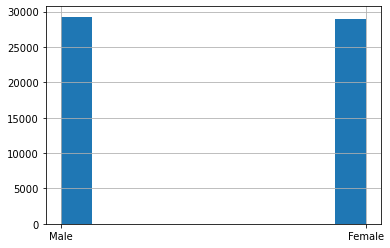

In [40]:
# Узнаем пол наших клиентов:
# Нашим товаром заинтересованы мужчины и женщины

object_check(df.gender)
df.gender.hist()

### customer_city

In [41]:
# Как мы видим, из многих городов заказывают наш товар
# Давайте выясним топ 15 городов

object_check(df.customer_city)

,customer_city
London,1544
Paris,1148
Cliffside,901
Berlin,572
Chula Vista,567
...,...
Bradenton,2
Braintree,1
Bellevue,1
Byron,1


['Rockhampton' 'Seaford' 'Burbank' 'Bendigo' 'Bellingham' 'Goulburn'
 'St. Leonards' 'Cranbourne' 'Tacoma' 'Lavender Bay' 'East Brisbane'
 'Newcastle' 'Warrnambool' 'Wollongong' 'Lincoln Acres' 'San Gabriel'
 'Concord' 'Beverly Hills' 'Colma' 'Solingen' 'Versailles' 'Hamburg'
 'Lemon Grove' 'Burien' 'Newton' 'Berlin' 'Stoke-on-Trent' 'Watford'
 'Tremblay-en-France' 'Metz' 'Gateshead' 'Milton Keynes' 'Saint Ouen'
 'Paris' 'Pantin' 'Cloverdale' 'Gold Coast' 'York' 'Hawthorne'
 'Warrington' 'Esher-Molesey' 'Eilenburg' 'N. Vancouver' 'Portland'
 'Roubaix' 'Frankfurt am Main' 'Cheltenham' 'Saint-Denis' 'Saarbrücken'
 'Les Ulis' 'Morangis' 'Offenbach' 'Lancaster' 'Cliffside' 'Seattle'
 'Bellflower' 'El Cajon' 'Shawnee' 'Spring Valley' 'Malabar' 'Perth'
 'Burlingame' 'Bremerton' 'W. Linn' 'San Carlos' 'Santa Monica' 'Rhodes'
 'Hobart' 'Townsville' 'Port Macquarie' 'Brisbane' 'Geelong' 'Victoria'
 'Sunbury' 'Lane Cove' 'Hervey Bay' 'Renton' 'Caloundra' 'Sooke'
 'Milwaukie' 'Dunkerque' 'Santa C

In [42]:
df.customer_city.value_counts().head(15)

London          1544
Paris           1148
Cliffside        901
Berlin           572
Chula Vista      567
Burien           563
Bellingham       549
Shawnee          549
N. Vancouver     546
Berkeley         546
Concord          540
Beaverton        535
Burlingame       516
Langley          511
Bellflower       511
Name: customer_city, dtype: int64

### sales_amount

count    58168.000000
mean       382.336169
std        755.592295
min          2.290000
25%          7.950000
50%         28.990000
75%         69.990000
max       2443.350000
Name: sales_amount, dtype: float64


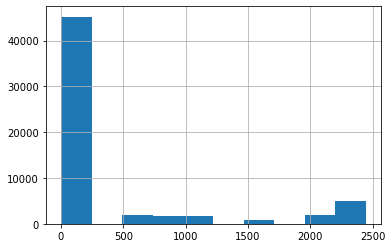

In [43]:
float_check(df.sales_amount)

In [44]:
# Проверим объем продаж
# Сначала проверим катгории товаров
# Велосипеды - самая покупаемая категория

sales_amount = df.groupby('product_category')[['sub_category','sales_amount']].max().sort_values('sales_amount', ascending = False)
sales_amount

,sub_category,sales_amount
product_category,,
Bikes,Touring Bikes,2443.35
Accessories,Tires and Tubes,159.00
Clothing,Vests,69.99


In [45]:
# Проверим теперь самый ходовой товар по категории

product_per_category = df.groupby('product_name')[['product_name','sub_category','sales_amount','customer_city']
                                                 ].max().sort_values('sales_amount', ascending = False)

In [46]:
def cost(column):
    sub_category = product_per_category[(product_per_category.sub_category == column)]['product_name'].max()
    city = product_per_category[(product_per_category.sub_category == column)]['customer_city'].max()
    return "Самый ходовой товар в категории " + column + ' : ' + sub_category + ' в городе ' + city

(*map(cost, df.sub_category.unique()),)

('Самый ходовой товар в категории Mountain Bikes : Mountain-500 Silver, 52 в городе York',
 'Самый ходовой товар в категории Fenders : Fender Set - Mountain в городе York',
 'Самый ходовой товар в категории Touring Bikes : Touring-3000 Yellow, 62 в городе York',
 'Самый ходовой товар в категории Tires and Tubes : Touring Tire Tube в городе York',
 'Самый ходовой товар в категории Helmets : Sport-100 Helmet, Red в городе York',
 'Самый ходовой товар в категории Jerseys : Short-Sleeve Classic Jersey, XL в городе York',
 'Самый ходовой товар в категории Bottles and Cages : Water Bottle - 30 oz. в городе York',
 'Самый ходовой товар в категории Caps : AWC Logo Cap в городе York',
 'Самый ходовой товар в категории Road Bikes : Road-750 Black, 58 в городе York',
 'Самый ходовой товар в категории Gloves : Half-Finger Gloves, S в городе York',
 'Самый ходовой товар в категории Bike Stands : All-Purpose Bike Stand в городе Yakima',
 'Самый ходовой товар в категории Socks : Racing Socks, M в гор

### product_name

Water Bottle - 30 oz.      4244
Patch Kit/8 Patches        3191
Mountain Tire Tube         3095
Road Tire Tube             2376
Sport-100 Helmet, Red      2230
AWC Logo Cap               2190
Sport-100 Helmet, Blue     2125
Fender Set - Mountain      2121
Sport-100 Helmet, Black    2085
Mountain Bottle Cage       2025
Road Bottle Cage           1712
Touring Tire Tube          1488
HL Mountain Tire           1396
ML Mountain Tire           1161
LL Road Tire               1044
Name: product_name, dtype: int64


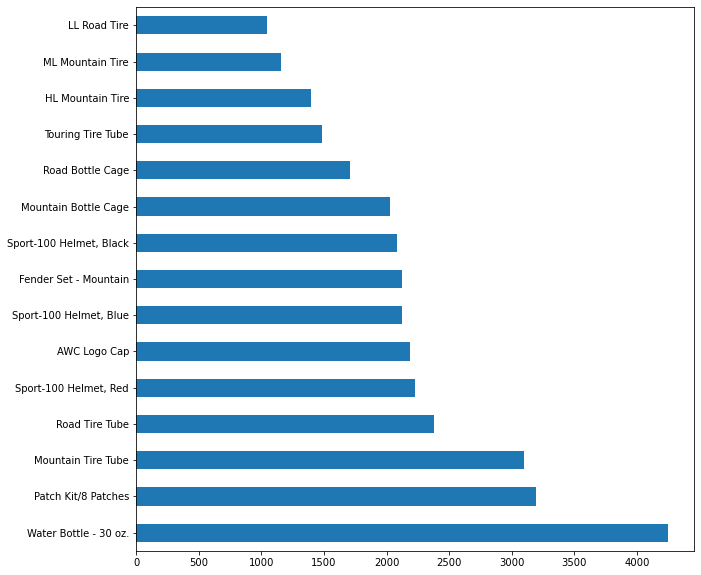

In [47]:
# Повторим действие выше и узнаем самый ходовой товар:
# Water Bottle - 30 oz.

print(df['product_name'].value_counts().head(15))
plt.rcParams['figure.figsize'] = (10,10)
product_name = df['product_name'].value_counts().nlargest(15).plot(kind='barh')

### standard_cost

count    58168.000000
mean       223.847465
std        447.200568
min          0.856500
25%          2.973300
50%         10.842300
75%         41.572300
max       1554.947900
Name: standard_cost, dtype: float64


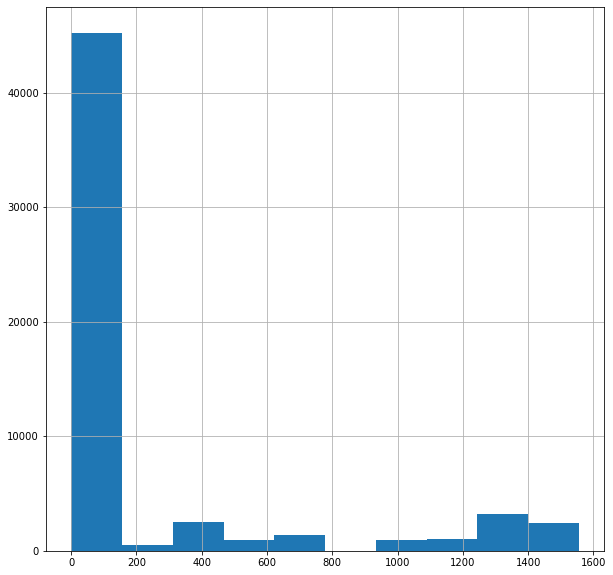

In [48]:
float_check(df.standard_cost)

In [49]:
# Сгруппируем данные, чтобы увидеть самые дорогостоящие товары по подгруппам

standard_cost = df.groupby('product_name')[['product_name','sub_category','standard_cost']].max().sort_values('standard_cost', ascending = False)

In [50]:
def cost(column):
    sub_category = standard_cost[(standard_cost.sub_category == column)]['product_name'].max()
    return "Самый дорогостоящий товар в категории " + column + ' : ' + sub_category

(*map(cost, df.sub_category.unique()),)

('Самый дорогостоящий товар в категории Mountain Bikes : Mountain-500 Silver, 52',
 'Самый дорогостоящий товар в категории Fenders : Fender Set - Mountain',
 'Самый дорогостоящий товар в категории Touring Bikes : Touring-3000 Yellow, 62',
 'Самый дорогостоящий товар в категории Tires and Tubes : Touring Tire Tube',
 'Самый дорогостоящий товар в категории Helmets : Sport-100 Helmet, Red',
 'Самый дорогостоящий товар в категории Jerseys : Short-Sleeve Classic Jersey, XL',
 'Самый дорогостоящий товар в категории Bottles and Cages : Water Bottle - 30 oz.',
 'Самый дорогостоящий товар в категории Caps : AWC Logo Cap',
 'Самый дорогостоящий товар в категории Road Bikes : Road-750 Black, 58',
 'Самый дорогостоящий товар в категории Gloves : Half-Finger Gloves, S',
 'Самый дорогостоящий товар в категории Bike Stands : All-Purpose Bike Stand',
 'Самый дорогостоящий товар в категории Socks : Racing Socks, M',
 'Самый дорогостоящий товар в категории Bike Racks : Hitch Rack - 4-Bike',
 "Самый доро